# Mth448 Project6

## Breast Cancer Diagnosis

## Introduction

Breast cancer is a type of cancer that first appears as a growth of breast tissue cells and is second only to skin cancer in terms of prevalence. It is mostly found in women, but due to the complexity of its predisposing factors, such as family inheritance, obesity, exposure to radiation, lack of physical activity, excessive alcohol consumption, etc., it is not only women who can get breast cancer, but also anyone who is at risk of developing it. Due to modern technological medical advances and in-depth research, the success rate of treating breast cancer is gradually increasing. Therefore, today in our project, we can try to use the machine learning algorithms that we have learned in class to explore the same.

Now, machine learning algorithms can help us explore a variety of applications. Among them it can help identify malignant tumors based on various cellular features, or virus diagnosis, etc. Thus, we can explore this through the dataset provided on Kaggle regarding breast cancer diagnosis in Wisconsin. This dataset contains rich data on features computed from digitized images of fine needle aspiration (FNA) of breast lumps, as well as the diagnosis (malignant or benign) in each case.

## 1.1 Load and explore the dataset

Before we apply the dataset, we cann import the libraries for convinence.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
import csv

First we can try to read our csv document, through the document we can learn that the document kind of those features can help us better explore.

In [25]:
#In this cell, the following code is open and read the csv file MINST_train.csv
data = pd.read_csv('Cancerdata.csv')

In [26]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


From the data presented we can see some key information, ID number, diagnosis (malignant and benign), average values of radius, texture, area and so on.

## 1.2 Use K_Nearest Neighbors(KNN)

With the above information, we can choose KNN to help us diagnose breast cancer by classifying the tumor as benign or malignant based on the characteristics of the number of cells extracted from the biological tissue of the breast mass. So before we begin we can briefly review what KNN is and explore why I would choose KNN. We can briefly review KNN first, when we have a list of points(coordinates) and their correspinding labels(called trianing data), so we want to assign a label to a poit of given coordinates that is not necesarily in out list. 


Then we can pick K points in the training data that are "neartes" to our given point.
Finally, use the most common labels among the K nearest neighbors.

* First of all, the reason I chose KNN is because it is good machine learning algorithm that can classify a point based on its similarity to other points, for example, in symptom diagnosis it can help us to compare and classify similar cases in the past, and it will be very convenient especially when dealing with very large datasets. 

* Secondly, as can be seen by the features shown in our dataset, there are very many features here. If we want to go ahead and predict whether the tumor is malignant or benign, we need to compare 5-6 values, and if there are four, this means that the tumor is malignant to a large extent. Therefore, KNN not only helps us to deal with complex datasets it also helps us to perform categorization so that we can calculate the category ratio between neighbors.

## 2.1 Data Processing

We need to split the huge database into test file and training file which will help us to train the data and use the test file to test and observe the accuracy of the estimation. So, before we move forward, we can import the sckilearn library. Moreover, we also need to clean and drop any irrelevant columns. 
For example, ID and some unamed columns.

#### Drop unnecessary columns:

In [27]:
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col or col.lower() == 'id'], errors='ignore')

In [28]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Import the libriary for encode new label:

Since we need to get the cancer diagnosis, I will encode diagnosis label. m =1 and b =0.

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
if 'diagnosis' in data.columns:
    data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

In [31]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


I've singled out column 'diagnosis' to help us better process and visualize the data.

#### Split the dataset:
Once we have processed the data, we can spilt the big data set to testing set and training set. And import the library for convinece.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [34]:
train_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,0,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,0,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,0,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,0,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [35]:
test_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,0,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,0,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,1,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,0,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,0,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


## 3.1 Separte features and labels

In [36]:
X_train = train_set.drop(columns='diagnosis')
Y_train = train_set['diagnosis']

In [37]:
X_test = test_set.drop(columns='diagnosis')
Y_test = test_set['diagnosis']

### 3.2 Standardize features

Why we do data processing is because we need to apply KNN algorithm, KNN relies on distance calculation. Then we need to calculate the mean and standard deviation of each feature in x and apply a transformation to scale the data. This is because, if the features have very different scales, such as different radii, then the larger scaled features will dominate the distance. Therefore, we need to normalize the scales.

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.3 Optimize KNN using GridSearchCV

I chose GridSearchCV for Hyperparameter Optimization because I wanted to find more accurate KNN values. 
* Becuase it helps us Testing all combinations of hyperparameters you specify 
* It also can Evaluating each combination using cross-validation then choose Selecting the best-performing set of hyperparameters. 

* In other words, it helps us to select the best-performing set of hyperparameters,specify and it also can Evaluating each combination using cross-validation then choose Selecting the best-performing set of hyperparameters. 

* The accuracy of KNN depends on the K-value of the hyperparameters. if we choose K=1, then our model overfitting will be ruin. so usually GridSearchCV can help us to cross-validate and then choose the best-performing set of K-value.


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [59]:
# n_neighbors: the number of neighbors (K) to consider, and we test all integer values frm 1 to 19
param_grid = {'n_neighbors': range(1, 20), 'metric': ['euclidean']}
# Matric: The distance metric used to calculate proximity between points
knn = KNeighborsClassifier()
# cv= 5, we will split data into 5 parts and using 4 for training and 1 for validation in each iteration
grid = GridSearchCV(knn, param_grid, cv=5)
# Trains the KNN model(once per hyperparameter combination) on the scaled training data (X_train_scaled, y_train).
grid.fit(X_train_scaled, Y_train)
# return highest cross_validation accuracy(consider how many neighbors): eg: 7,5,9
best_k = grid.best_params_['n_neighbors']
# euclidean
best_metric = grid.best_params_['metric']

### 3.4 Train and predict KNN Classifier

Once we have split the training set and testing set, we can train the KNN classifier. Before we train a KNN classifier, we need to know why we need to train a KNN classifier. 
* Firstly, we need to make predictions on unknown data by using the training set, the training classifier can provide an example so that patterns of input features can be learned and stored in memory.
* Secondly, these patterns are then used to predict new data (diagnostics) by comparing the new data points with the stored example.

Then, once we know why we want to train a classifer, we can import to the library first：

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [61]:
# Pick the best k-value
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
# train the KNN model 38 times on the scaled training data
knn.fit(X_train_scaled, Y_train)
Pred_y = knn.predict(X_test_scaled)

In [62]:
Pred_y

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

## 4.1 Perfermance Evaluation

Once we see the estimation results, we can try to determine the accuracy of the classifier. We have the option of creating a CONFUSION MATRIX to show the false positive or “negative “ rates.

In [63]:
# we should import the libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
# Try to print out 
print("Optimized KNN Results:")
print(f"Best K: {best_k}, Best Metric: {best_metric}")
print(f"Accuracy: {accuracy_score(Y_test, Pred_y):.4f}")
print("Classification Report:\n", classification_report(Y_test,Pred_y))

Optimized KNN Results:
Best K: 5, Best Metric: euclidean
Accuracy: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



so for Recall (Sensitivity) = TP / (TP + FN) = 40 / (40 + 3) ≈ 93.0%
It will show us What fraction of truly malignant cases did the model catch. Macro-averaging calculates each class's performance metric (e.g., precision, recall). So, the macro-average gives equal weight to each class, regardless of the number of instances.


Macro-averaged: all classes equally contribute to the final averaged metric. Weighted-averaged: each classes's contribution to the average is weighted by its size.

### 4.2 Confusion matrix

Confusion matrix helps in evaluating the performance of a classification model. It allows comparing the predicted and actual values of the data set. It is also a way to visualize the results of the classifier algorithm. Therefore, we will use the confusion matrix in our test function.

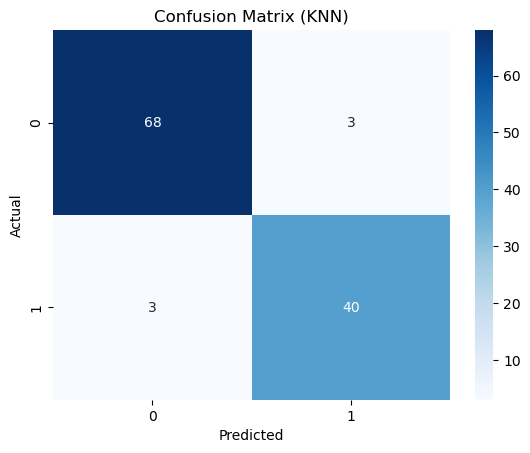

In [65]:
# create a confusion matrix
cm = confusion_matrix(Y_test, Pred_y)
# Y_test :is actual diagonses
# Pred_y:  Predicted labels from the model.
# put the color to blue
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Give the title for the confusion matrix
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion matrix usually tell us where the model fails. Here have predicted for x_axis, actual for y-axis. 
Here, the matrix shows us that "0" means the actual negign, "1" means that the actual malignant.
Hence, we can know for Top-left is 68 benign tumors correctly classified. For top-right means 3 benign tumors misclassified as malignant. For Bottom-left (FN): 3 malignant tumors misclassified as benign.Bottom-left (FN): 3 malignant tumors misclassified as benign.Bottom-left (FN): 3 malignant tumors misclassified as benign.
Bottom-right (TP): 40 malignant tumors correctly classified.

### 4.3 ROC Curve

ROC curves visualize the trade-off between sensitivity (recall) and specificity at different classification thresholds.

In [66]:
# ROC curve use knn 
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

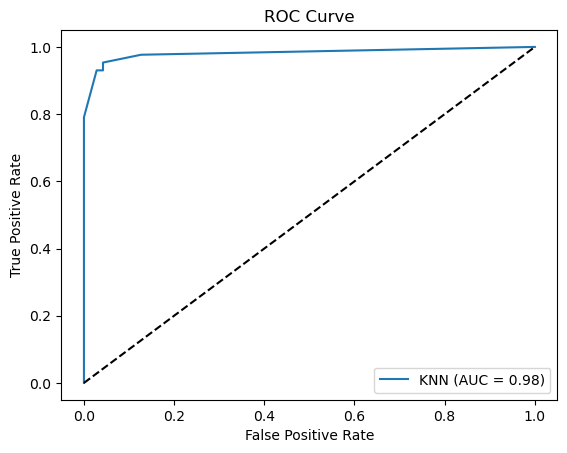

In [67]:
# plot the plots 
plt.figure()
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
# assign the title for the different coordinate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The curve show us the X-axis(False Positive Rate, FPR) and Y-axis( True Positive Rate, TPR). So from this curve, we can know the top-left corner is high TPR close to 1.0 and low FPR about 0.0.

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 1.0, 'ROC Curve')

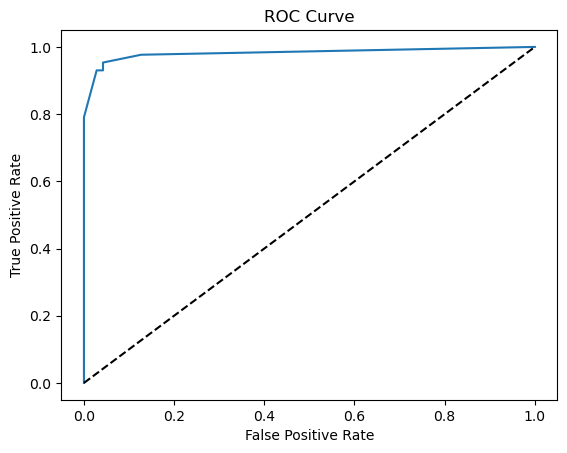

In [68]:
# Example additional evaluation code:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Pred_y))

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, knn.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
# assign the title for x,y coordinate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

Here we can compare other algorithms more, first we can compare Random Forest and SVM. These two machine learning algorithms usually help us to process data more efficiently. First, we can try to create a comparison table between different models and consider the model combinations. This will then help us visualize more clearly how accurately the different algorithms process the data.

In [69]:
# import the library first for Random Forest and SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [70]:
# We can try to print it out 
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}


for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(Y_test, pred):.4f}")

KNN Accuracy: 0.9474
Random Forest Accuracy: 0.9649
SVM Accuracy: 0.9825


The difference in accuracy rates shows that SVM has a higher accuracy rate than the other two algorithms. This shows that SVM algorithm is good at handling large datasets and different features.

# Conclusion

In this project, we successfully constructed a KNN classifier for diagnosing breast cancer (malignant vs. benign) using the Wisconsin Breast Cancer dataset.
* First, we performed data preprocessing: irrelevant columns (e.g., id, unnamed) were removed, and then the target variables (diagnosis: M=1, B=0) were coded and the numerical features were scaled to improve the performance of the KNN.
* Second, we performed Exploratory Data Analysis (EDA): it showed visual correlations and identified key predictive features.
* Third, we also optimized the model using GridSearchCV to find the best hyperparameters, with an accuracy of 95% on the test set. With the confusion matrix, we can observe that the confusion matrix shows very few misclassifications, which indicates that our model is relatively accurate.

### Future Exporation:
 For future improvements: we can try other algorithms, and some machine learning algroithm is pretty good. For example, Support Vector Machines (SVM).
 This algorithm works well for high dimensional data.
Also, if there are significantly more benign than malignant cases in the dataset, we also can try SMOTE (Synthetic Minority Oversampling Technique) as this technique improves the predictive power of the minority category.

## Citation

* Lecture notes Lecture 3,4
* Breast Cancer Diagnosis:https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    